## Start The Project

In [3]:
# prompt: import important library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/noshowappointments-kagglev2-may-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Check for duplicates
duplicate_rows_df = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows_df)}")

Number of duplicate rows: 0


In [7]:
# exploring the unique values of each column
df.nunique()

,0
PatientId,62299
AppointmentID,110527
Gender,2
ScheduledDay,103549
AppointmentDay,27
Age,104
Neighbourhood,81
Scholarship,2
Hipertension,2
Diabetes,2


In [8]:
# find the value count of handcap

df['Handcap'].value_counts()

,count
Handcap,
0,108286
1,2042
2,183
3,13
4,3


In [9]:
# exploring age column distribution
df['Age'].describe()

,Age
count,110527.000000
mean,37.088874
std,23.110205
min,-1.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


In [10]:
# Check for null values
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [11]:
# drop null values in the dataset
df.dropna(inplace=True)
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


## Data Cleaning
in this section, we'd perform some operations on our dataset based on the previous findings to make our analysis more accurate and clear.



---

Dropping PatientId and AppointmentId columns

In [12]:
# Dropping PatientId and AppointmentId columns

df = df.drop(['PatientId', 'AppointmentID'], axis=1)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Handling date data type

In [13]:
df.AppointmentDay.unique


<bound method Series.unique of 0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, Length: 110527, dtype: object>

In [14]:
# extracting only day, month and year values
df['ScheduledDay'] = df['ScheduledDay'].str[:10]
df['AppointmentDay'] = df['AppointmentDay'].str[:10]

# changing data type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# confirming changes
print(df[['AppointmentDay', 'ScheduledDay']].dtypes)
df.head()

AppointmentDay    datetime64[ns]
ScheduledDay      datetime64[ns]
dtype: object


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now, we'd move into appending a new column that holds number of days to the appointment.

In [15]:
# making new due days column
df['due-days'] = df['AppointmentDay'] - df['ScheduledDay']

# converting data type
df['due-days'] = df['due-days'].dt.days

# drop sch and appoint col
df.drop(['AppointmentDay', 'ScheduledDay'], axis = 1, inplace = True)

In [16]:
# viewing summery statistics
df['due-days'].describe()

,due-days
count,110527.000000
mean,10.183702
std,15.254996
min,-6.000000
25%,0.000000
50%,4.000000
75%,15.000000
max,179.000000


In [17]:
# viewing negative days values
df[df['due-days'] < 0 ]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
27033,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [18]:
# dropping these values and confirming changes
df.drop(df[df['due-days'] < 0].index, inplace = True)
df['due-days'].describe()

,due-days
count,110522.000000
mean,10.184253
std,15.255115
min,0.000000
25%,0.000000
50%,4.000000
75%,15.000000
max,179.000000


In [19]:
# converting column and confirming changes
df['Gender'] = df['Gender'].astype('category')

df['Gender'].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False, categories_dtype=object)

Converting Scholarship, Hipertension, Diabetes, Alcoholism, Handcap and SMS_recieved to boolean data type

In [20]:
# converting columns to bool and confirming changes
cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
df[cols] = df[cols].astype('bool')
df[cols].dtypes

,0
Scholarship,bool
Hipertension,bool
Diabetes,bool
Alcoholism,bool
SMS_received,bool



Parsing and casting No-show column

In [21]:
# mapping alues to be more familiar
df.loc[df['No-show'] == 'Yes', 'No-show'] = 0
df.loc[df['No-show'] == 'No', 'No-show'] = 1

# casting dt type and confirming changes
df['No-show'] = df['No-show'].astype(bool)
df['No-show'].dtypes

dtype('bool')

Cleaning Handcap column

In [22]:
# viewing rows with values of handcap > 1
df[df['Handcap'] > 1]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
946,M,94,BELA VISTA,False,True,True,False,2,True,True,15
1665,M,64,SANTA MARTHA,False,True,False,True,2,True,True,30
1666,M,64,SANTA MARTHA,False,True,False,True,2,False,True,30
2071,M,64,SANTA MARTHA,False,True,False,True,2,False,True,0
2091,F,11,ANDORINHAS,False,False,False,False,2,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
108376,F,44,ROMÃO,False,True,True,False,2,True,True,6
109484,M,64,DA PENHA,False,True,True,False,2,False,True,2
109733,F,34,JUCUTUQUARA,False,False,False,False,2,True,True,4
109975,M,39,PRAIA DO SUÁ,True,False,False,False,2,True,True,4


We have 199 rows with inconsistant values, we'd replace them with 1 to treat them as beeing handcaped

In [23]:
# filling the bigger values with 1
df.loc[df['Handcap'].isin([2, 3, 4]), 'Handcap'] = 1

# casting type and confirming changes
df['Handcap'] = df['Handcap'].astype('bool')
df['Handcap'].unique()

array([False,  True])


Cleaning Age column

In [24]:
#exploring values below 0
df[df['Age'] < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
99832,F,-1,ROMÃO,False,False,False,False,False,False,True,0


In [25]:
# dropping row with negative age and confirming changes
df.drop(df[df['Age'] < 0].index, inplace = True)
df[df['Age'] < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days


In [26]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
0,F,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,M,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,F,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,F,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,F,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Gender         110521 non-null  category
 1   Age            110521 non-null  int64   
 2   Neighbourhood  110521 non-null  object  
 3   Scholarship    110521 non-null  bool    
 4   Hipertension   110521 non-null  bool    
 5   Diabetes       110521 non-null  bool    
 6   Alcoholism     110521 non-null  bool    
 7   Handcap        110521 non-null  bool    
 8   SMS_received   110521 non-null  bool    
 9   No-show        110521 non-null  bool    
 10  due-days       110521 non-null  int64   
dtypes: bool(7), category(1), int64(2), object(1)
memory usage: 4.2+ MB


## Data Visualization and EDA

In [28]:
# setting seaborn configurations
sns.set_style("whitegrid")

How often do men go to hospitals compared to women? Which of them is more likely to show up?

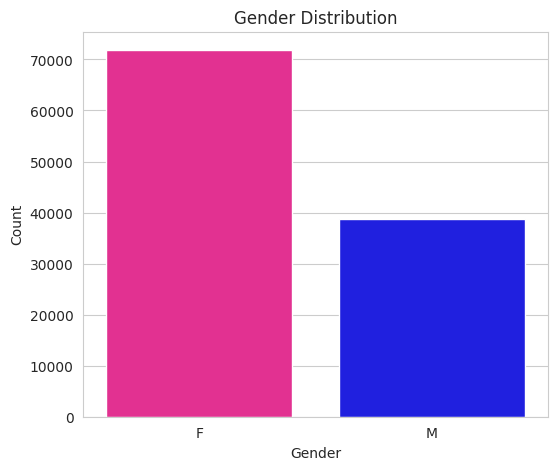

In [29]:
# Countplot of gender distribution
plt.figure(figsize=(6, 5))
sns.countplot(x='Gender', data=df, palette={'F': 'deeppink', 'M': 'blue'})
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

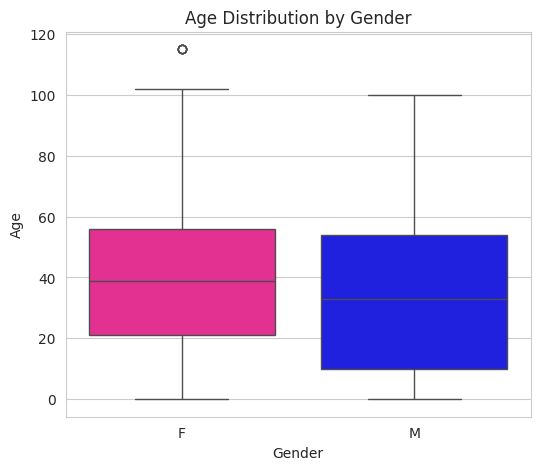

In [30]:
# Count boxplot of gender distribution against age
plt.figure(figsize=(6, 5))
sns.boxplot(x='Gender', y='Age', data=df, palette={'F': 'deeppink', 'M': 'blue'})
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

we can notice that nearly half of our dataset conists of women with wider age destribution and some outliers, all of which achiees a rate higher than men.


In [31]:
df['No-show'].value_counts()

,count
No-show,
True,88207
False,22314


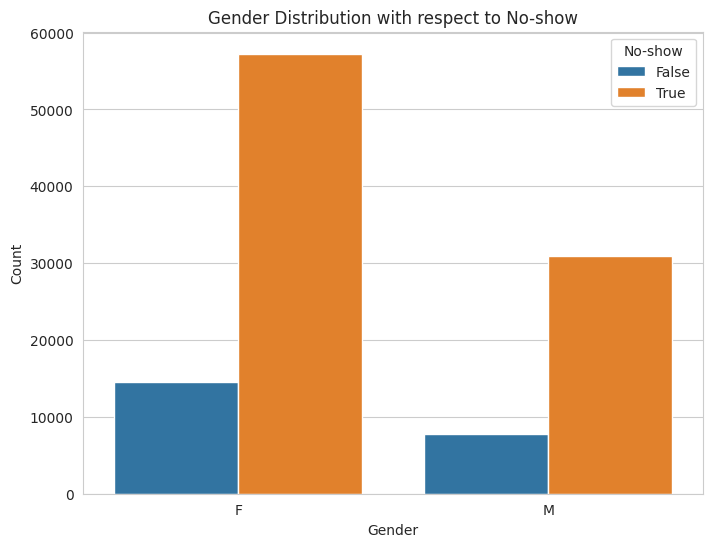

In [32]:
# Countplot of gender distribution with respect to no-show
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='No-show', data=df)
plt.title('Gender Distribution with respect to No-show')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

 * from the above chart, we can come up with a conclusion that women do show up on their appointments more often than men do, but this may b affected by the percentage of women on this dataset.

Does recieving an SMS as a reminder affect whether or not a patient may show up? is it correlated with number of days before the appointment?

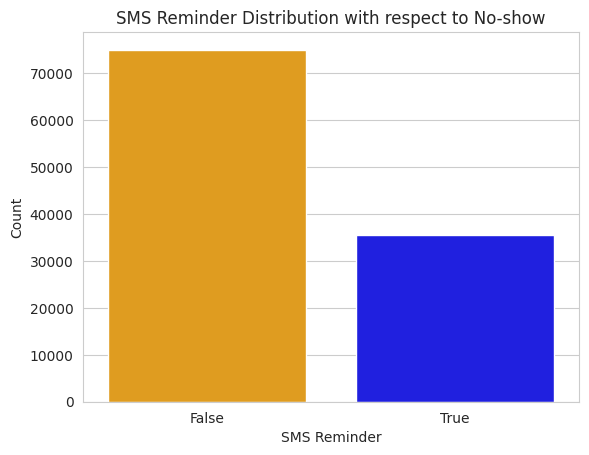

In [33]:
sns.countplot(x='SMS_received', data=df,palette={'False': 'orange', 'True': 'blue'})
plt.title('SMS Reminder Distribution with respect to No-show')
plt.xlabel('SMS Reminder')
plt.ylabel('Count')
plt.show()

In [34]:
df['SMS_received'].value_counts()

,count
SMS_received,
False,75039
True,35482


* we can see that 69.20% of our patients did not reciee any SMS reminder of their appointments, cound this be affecting their showin up?

Text(0.5, 0, 'SMS Reminder')

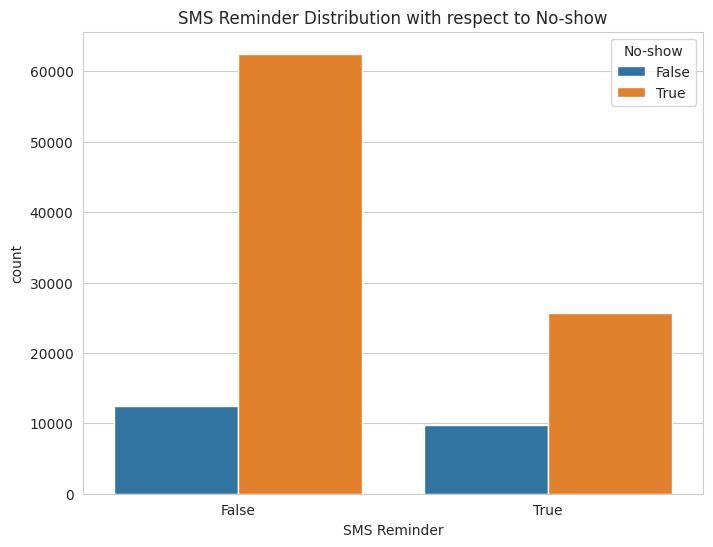

In [35]:
# showing the sms destribution with respect to the no-show colunmn
plt.figure(figsize=(8, 6))
sns.countplot(x='SMS_received', hue='No-show', data=df)
plt.title('SMS Reminder Distribution with respect to No-show')
plt.xlabel('SMS Reminder')

* we can see that our previous deduction was not quiet correct, as the vast majority of our patients did not recieve any SMS reminder and yet they showed up on their appointments.

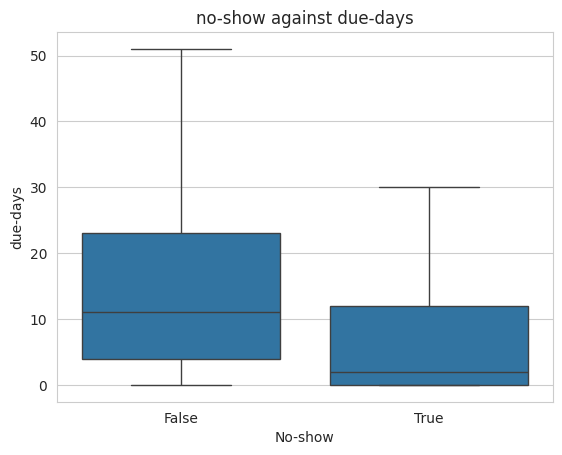

In [36]:
 # viewing the correlation between no-show and due-days without outliers
 sns.boxplot(x = "No-show" , y = "due-days",data = df , showfliers = False)
 plt.title("no-show against due-days")
 plt.show()

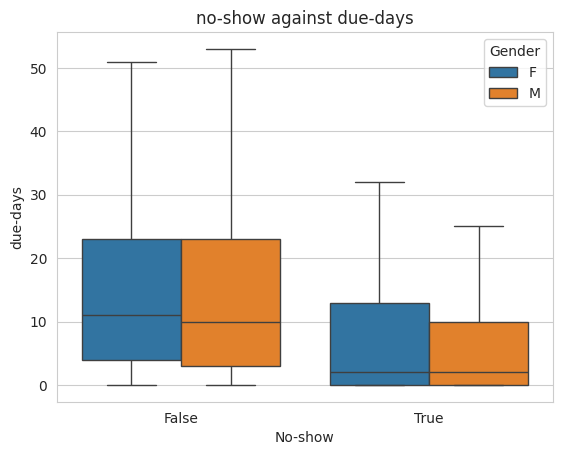

In [37]:
# viewing the correlation between no-show and due-days without outliers with respect to gender
sns.boxplot(x = "No-show" , y = "due-days",data = df ,hue ="Gender", showfliers = False)
plt.title("no-show against due-days")
plt.show()

gender does not affect number of due days and showing up at an appointment that much.

##Does having a scholarship affects showing up on a hospital appointment? What are the age groups affected by this?

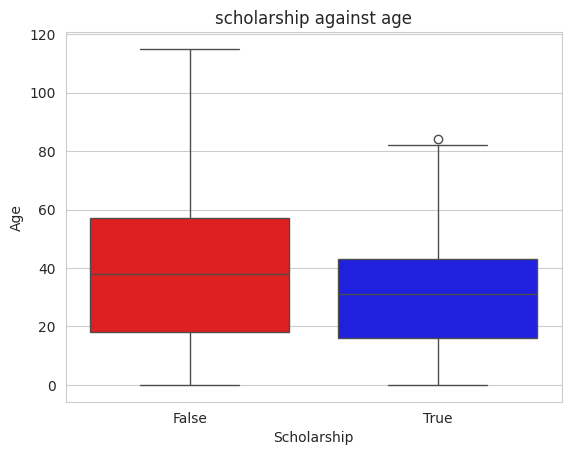

In [38]:
# plotting having a scholarship against age
sns.boxplot(x = "Scholarship", y = "Age",data = df , palette={'False': 'Red', 'True': 'blue'} )
plt.title("scholarship against age")
plt.show()

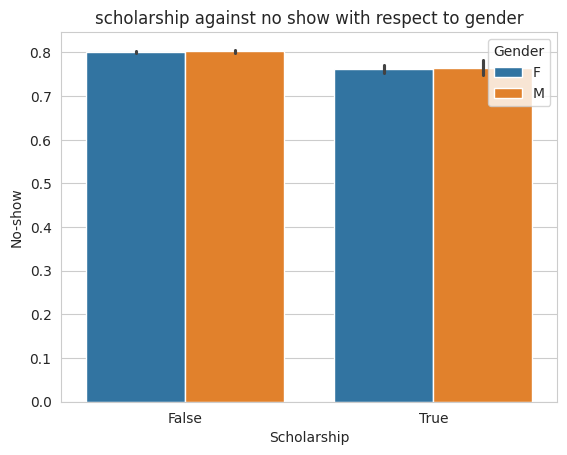

In [39]:
# plotting having a scholarship against no show with respect to gender
sns.barplot(x = "Scholarship" , y = "No-show" , hue = "Gender", data = df )
plt.title("scholarship against no show with respect to gender")
plt.show()

<Axes: >

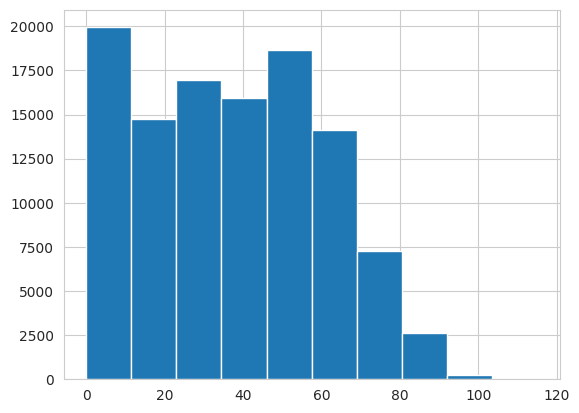

In [40]:
# ploting age destribution
df["Age"].hist()

we can see that having a scolarship does not affect showing up to a doctor appointment that much and that huge age group is enrolled to that scholarship and also enrol their babies on.

## Does having certain deseas affects whather or not a patient may show up to their appointment? is it affected by gender?

In [ ]:
# plotting deseases against no show
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x = "Hipertension" , data = df , hue = "No-show")
plt.subplot(2,2,2)
sns.countplot(x = "Diabetes" , data = df , hue = "No-show")
plt.subplot(2,2,3)
sns.countplot(x = "Alcoholism" , data = df , hue = "No-show")
plt.subplot(2,2,4)
sns.countplot(x = "Handcap" , data = df , hue = "No-show")
plt.show()

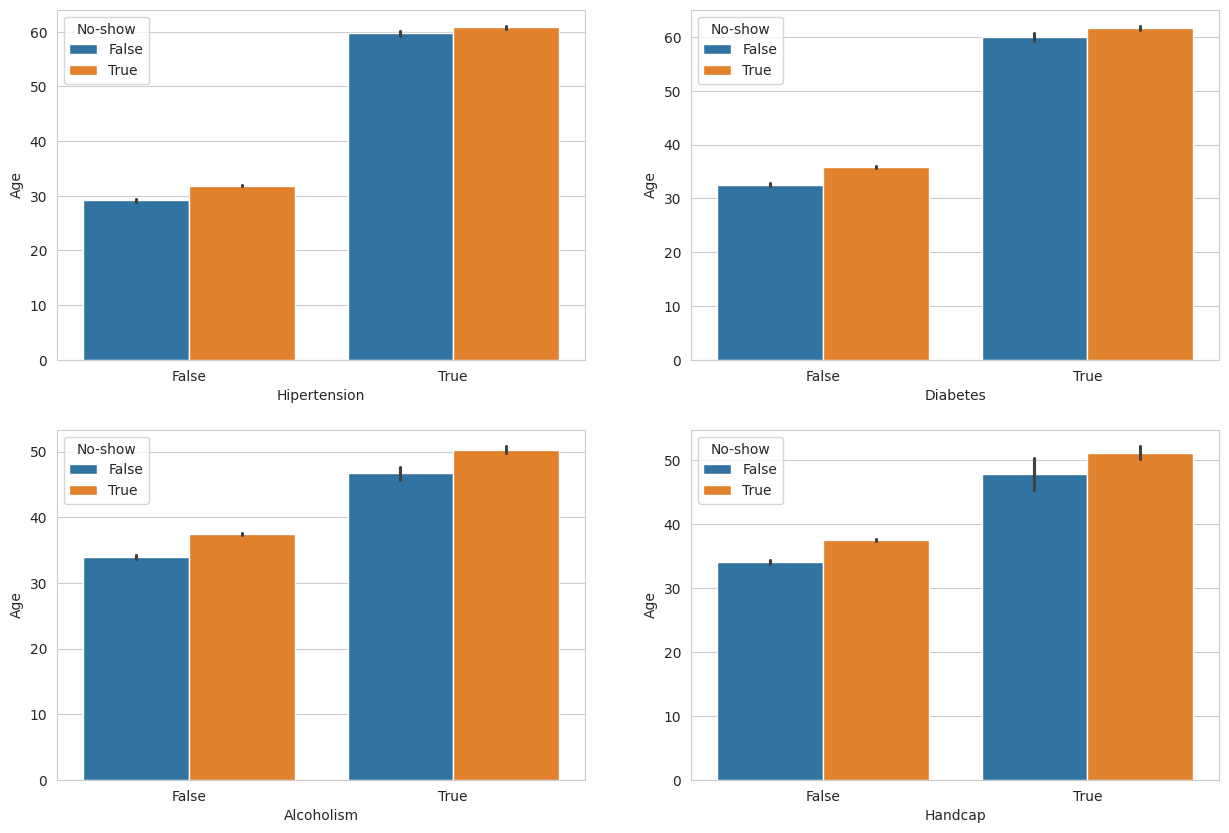

In [42]:
# plotting deseases against no show with respect to age
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = "Hipertension" ,y = "Age", data = df , hue = "No-show")
plt.subplot(2,2,2)
sns.barplot(x = "Diabetes" ,y = "Age",  data = df , hue = "No-show")
plt.subplot(2,2,3)
sns.barplot(x = "Alcoholism" ,y = "Age", data = df , hue = "No-show")
plt.subplot(2,2,4)
sns.barplot(x = "Handcap" ,y = "Age", data = df , hue = "No-show")
plt.show()

* from the previous set of plots, we can conclude that the vast majority of our dataset does not have chronic deseases, yet, they are existed in so many young people.
* having a chronic deseas may affect your showing up at a hospital's appointment.

## Conclusion
Q1: How often do men go to hospitals compared to women? Which of them is more likely to show up?

* Nearly half of our dataset conists of women with wider age destribution and some outliers, all of which achiees a rate higher than men.

* It is obvious that 79.8% of our patients did show up on their appointments and only 20.1% of them did not.

* Women do show up on their appointments more often than men do, but this may b affected by the percentage of women on this dataset.

### Q2: Does recieving an SMS as a reminder affect whether or not a patient may show up? is it correlated with number of days before the appointment?
* 67.8% of our patients did not reciee any SMS reminder of their appointments, yet they showed up on their appointments.
* It is clear that there is a positive correlation between number of due days and whether a patient shows up or not.
* Patient with appointments from 0 to 30 days tend to show up more regularly, while patients with higher number of days tend to not show up.
* gender does not affect number of due days and showing up at an appointment that much.


### Q3: Does having a scholarship affects showing up on a hospital appointment? What are the age groups affected by this?
* Having a scholarship does not affect showing up to a doctor appointment that much.
* Huge age group is enrolled to that scholarship and also enrol their babies on.
### Q4: Does having certain deseases affect whather or not a patient may show up to their appointment? is it affected by gender?
* We can conclude that the vast majority of our dataset does not have chronic deseases, yet, they are existed in so many young people.
* Having a chronic deseas may affect your showing up at a hospital's appointment.